In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
baseDir = r'.\Data'
li = []
for fileName in os.listdir(baseDir):
    currentFilePath = os.path.join(baseDir, fileName)
    df1 = pd.read_csv(currentFilePath, header=None)
    df1[0] = fileName
    li.append(df1)
df = pd.concat(li)
df[0].unique()

array(['1.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv',
       '15.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv',
       '8.csv', '9.csv'], dtype=object)

In [4]:
df.shape

(1926896, 5)

In [5]:
df.head()

,0,1,2,3,4
0,1.csv,1502,2215,2153,1
1,1.csv,1667,2072,2047,1
2,1.csv,1611,1957,1906,1
3,1.csv,1601,1939,1831,1
4,1.csv,1643,1965,1879,1


In [6]:
df[4].unique()

array([1, 2, 3, 4, 5, 6, 7, 0], dtype=int64)

In [7]:
df[4].value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: 4, dtype: int64

#### Removing all rows containg '0' as the label

In [8]:
df = df[df[4] != 0]

#### Checking for Null values

In [11]:
df.isnull().sum()

filename    0
x_acc       0
y_acc       0
z_acc       0
label       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923177 entries, 0 to 166739
Data columns (total 5 columns):
filename    object
x_acc       int64
y_acc       int64
z_acc       int64
label       int64
dtypes: int64(4), object(1)
memory usage: 88.0+ MB


In [9]:
df.rename(columns = {0:'filename', 1:'x_acc', 2:'y_acc', 3:'z_acc', 4:'label'}, inplace = True)
df.head()

,filename,x_acc,y_acc,z_acc,label
0,1.csv,1502,2215,2153,1
1,1.csv,1667,2072,2047,1
2,1.csv,1611,1957,1906,1
3,1.csv,1601,1939,1831,1
4,1.csv,1643,1965,1879,1


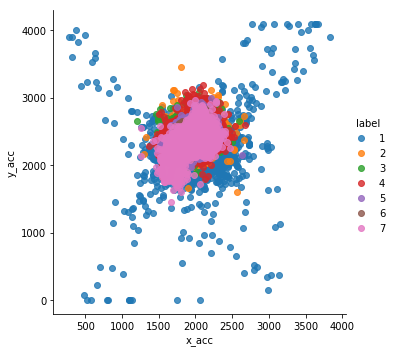

In [10]:
sns.lmplot(x="x_acc", y="y_acc", hue="label", data=df, fit_reg=False)

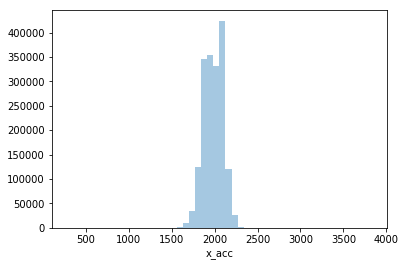

In [17]:
sns.distplot(df.x_acc, kde=False)

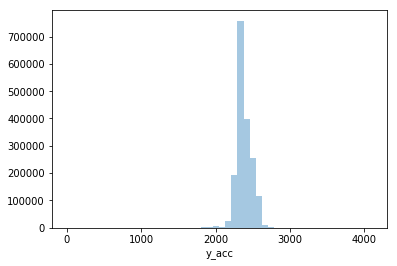

In [18]:
sns.distplot(df.y_acc, kde=False)

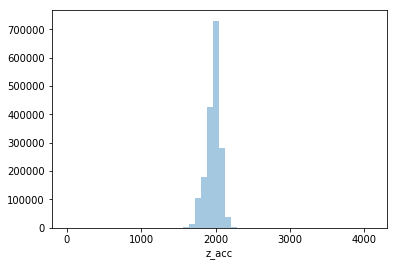

In [19]:
sns.distplot(df.z_acc, kde=False)

In [13]:
from sklearn import model_selection
from sklearn import utils
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn import feature_selection
from sklearn import naive_bayes
from sklearn import neighbors

In [14]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames=["DecisionTree","KNN","NB"]
    models=list()
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=5
            model = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)
            model.fit(Xtrain,ytrain)
        else:
            model.fit(Xtrain,ytrain)
        trainprediction=model.predict(Xtrain)
        testprediction=model.predict(Xtest)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY"]
    return pd.DataFrame(stats,columns=colnames)

In [18]:
X = df.drop(['filename','label'], axis=1)
y = df['label']

In [19]:
X.head()

,x_acc,y_acc,z_acc
0,1502,2215,2153
1,1667,2072,2047
2,1611,1957,1906
3,1601,1939,1831
4,1643,1965,1879


In [20]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)
modelstats1(Xtrain,Xtest,ytrain,ytest)

,MODELNAME,ACCURACY
0,DecisionTree-train,0.956270
1,DecisionTree-test,0.658319
2,KNN-train,0.790427
3,KNN-test,0.724527
4,NB-train,0.433865
5,NB-test,0.433233


In [63]:
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection

In [104]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames = ["KNN"]
    models=list()
    models.append(neighbors.KNeighborsClassifier())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            for k in range(25,30):
                model = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)
                model.fit(Xtrain,ytrain)
                trainprediction=model.predict(Xtrain)
                testprediction=model.predict(Xtest)
                scores=list()
                scores.append(name+"-train")
                scores.append(metrics.accuracy_score(ytrain,trainprediction))
                stats.append(scores)
                scores=list()
                scores.append(name+"-test")
                scores.append(metrics.accuracy_score(ytest,testprediction))
                stats.append(scores)
                print("for k = ",k,"training accuracy = ",metrics.accuracy_score(ytrain,trainprediction),"testing accuracy = ",metrics.accuracy_score(ytest,testprediction))
        else:
            model.fit(Xtrain,ytrain)
            
        colnames=["MODELNAME","ACCURACY"]
    return pd.DataFrame(stats,columns=colnames)

### Adding another feature in the dataframe

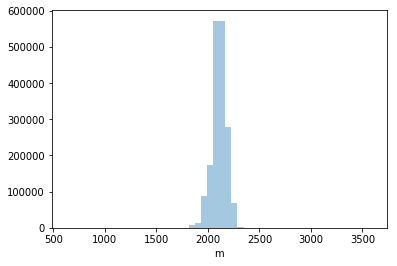

In [24]:
df['m'] = (df['x_acc']+df['y_acc']+df['z_acc'])/3
df['m'] = df.m.astype(int)
sns.distplot(df.m, kde=False)

In [84]:
X = df.drop(['filename','label'], axis=1)
y = df['label']

In [85]:
X.head()

,x_acc,y_acc,z_acc,m
0,1502,2215,2153,1956
1,1667,2072,2047,1928
2,1611,1957,1906,1824
3,1601,1939,1831,1790
4,1643,1965,1879,1829


#### Removing unnecessary

In [22]:
df = df[df['label'] != 0]
df = df[df['label'] != 2]
df = df[df['label'] != 5]
df = df[df['label'] != 6]

In [23]:
X = df.drop(['filename','label'], axis=1)
y = df['label']

In [86]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)
modelstats1(Xtrain,Xtest,ytrain,ytest)

for k =  5 training accuracy =  0.8396930232034369 testing accuracy =  0.7870790834640083
for k =  9 training accuracy =  0.8283805735263481 testing accuracy =  0.7999251140884048
for k =  13 training accuracy =  0.8238472886156202 testing accuracy =  0.8048321119797752
for k =  17 training accuracy =  0.8211375933965079 testing accuracy =  0.8068619143203822


,MODELNAME,ACCURACY
0,KNN-train,0.839693
1,KNN-test,0.787079
2,KNN-train,0.828381
3,KNN-test,0.799925
4,KNN-train,0.823847
5,KNN-test,0.804832
6,KNN-train,0.821138
7,KNN-test,0.806862


In [100]:
error_rate = []
for i in range(5,50,2):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(Xtrain,ytrain)
    pred_i = knn.predict(Xtest)
    y = np.mean(pred_i != ytest)
    error_rate.append(np.mean(pred_i != ytest))
    print("K = ",i," Error Rate = ", y)

K =  5  Error Rate =  0.21292091653599168
K =  7  Error Rate =  0.20449765911144768
K =  9  Error Rate =  0.20007488591159522
K =  11  Error Rate =  0.1969161643773912
K =  13  Error Rate =  0.19516788802022483
K =  15  Error Rate =  0.19395732629143006
K =  17  Error Rate =  0.1931380856796178
K =  19  Error Rate =  0.19242019442184416
K =  21  Error Rate =  0.1919106323918166
K =  23  Error Rate =  0.19144611451913954
K =  25  Error Rate =  0.19108576126033552
K =  27  Error Rate =  0.19074511482037235
K =  29  Error Rate =  0.19050300247461338
K =  31  Error Rate =  0.19003566934210192
K =  33  Error Rate =  0.19020740019200072
K =  35  Error Rate =  0.18999907096425464
K =  37  Error Rate =  0.18991742842905687
K =  39  Error Rate =  0.18951203101290234
K =  41  Error Rate =  0.18968657712263554
K =  43  Error Rate =  0.18972599076031724
K =  45  Error Rate =  0.18955707517025283
K =  47  Error Rate =  0.18965279400462265
K =  49  Error Rate =  0.18951766153257116


Minimum error:- 0.18951203101290234


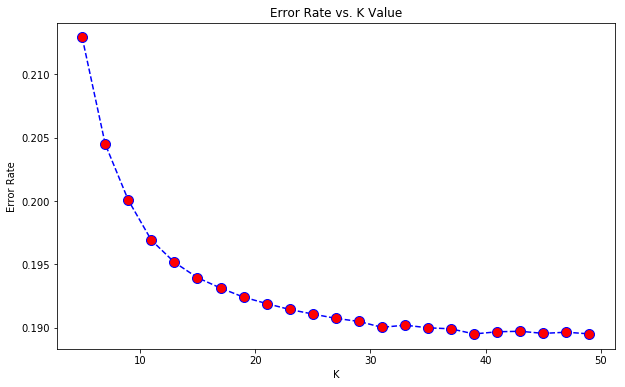

In [101]:
plt.figure(figsize=(10,6))
plt.plot(range(5,50,2),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate))

Minimum error:- 0.18934593068267236 at K = 5


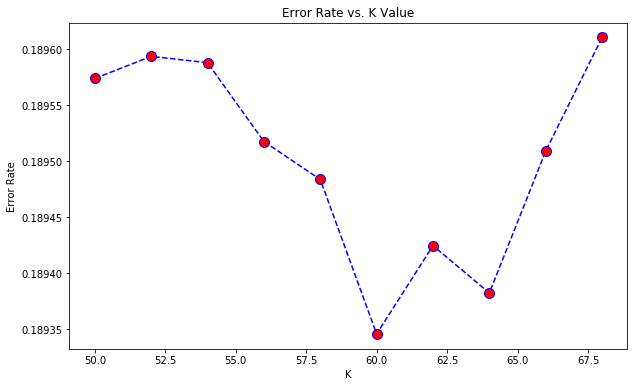

In [95]:
plt.figure(figsize=(10,6))
plt.plot(range(50,70,2),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [106]:
X = df.drop(['filename','label'], axis=1)
y = df['label']
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)
modelstats1(Xtrain,Xtest,ytrain,ytest)

for k =  25 training accuracy =  0.8183314752566117 testing accuracy =  0.8089142387396645
for k =  26 training accuracy =  0.8181027347511022 testing accuracy =  0.809139459526417
for k =  27 training accuracy =  0.8179844935051773 testing accuracy =  0.8092548851796276
for k =  28 training accuracy =  0.8176762216854445 testing accuracy =  0.8094885517458834
for k =  29 training accuracy =  0.8174911178302169 testing accuracy =  0.8094969975253866


,MODELNAME,ACCURACY
0,KNN-train,0.818331
1,KNN-test,0.808914
2,KNN-train,0.818103
3,KNN-test,0.809139
4,KNN-train,0.817984
5,KNN-test,0.809255
6,KNN-train,0.817676
7,KNN-test,0.809489
8,KNN-train,0.817491
9,KNN-test,0.809497


In [107]:
import pickle as pkl

#### Final Model Selection and Saving the model

In [113]:
model = neighbors.KNeighborsClassifier(n_neighbors=29, p=2)
model.fit(Xtrain, ytrain)
filename = 'final_model.sav'
pkl.dump(model, open(filename, 'wb'))

In [120]:
loaded_model = pkl.load(open(filename, 'rb'))

In [121]:
result = loaded_model.score(Xtest, ytest)
print(result)

0.8094969975253866


In [123]:
trainprediction=loaded_model.predict(Xtrain)

In [125]:
trainprediction

array([4, 7, 4, ..., 7, 7, 7], dtype=int64)

In [126]:
metrics.accuracy_score(ytrain,trainprediction)

0.8174911178302169

In [128]:
stats=[]
trainprediction=loaded_model.predict(Xtrain)
testprediction=loaded_model.predict(Xtest)
scores=list()
scores.append("KNN-train")
scores.append(metrics.accuracy_score(ytrain,trainprediction))
stats.append(scores)
scores=list()
scores.append("KNN-test")
scores.append(metrics.accuracy_score(ytest,testprediction))
stats.append(scores)
colnames=["MODELNAME","ACCURACY"]
pd.DataFrame(stats,columns=colnames)

,MODELNAME,ACCURACY
0,KNN-train,0.817491
1,KNN-test,0.809497
